In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from memory import Memory
from random import random
from model import AMTEA
import numpy as np
import time
from solver import Solver
from task import *
import cProfile
import pstats


In [56]:
np.random.seed(0)

In [57]:
import os, shutil
folder = 'cache/solvers'
for filename in os.listdir(folder):
	if filename in ['ga.py', 'de.py']:
		continue
	file_path = os.path.join(folder, filename)

	try:
		if os.path.isfile(file_path) or os.path.islink(file_path):
			os.unlink(file_path)
		elif os.path.isdir(file_path):
			shutil.rmtree(file_path)
	except Exception as e:
		print('Failed to delete %s. Reason: %s' % (file_path, e))

In [58]:
tasks, task_names = get_2_tasks(0)
lst_tasks = tasks

CI_H


In [59]:
for task in lst_tasks:
    print(task.task_name)

CEC_44
CEC_47


In [ ]:
lst_tasks = [GNBGTask(1, 100), GNBGTask(2, 100)]

In [ ]:
amtea = AMTEA(pop_size=100, memory_size=5, lst_tasks=lst_tasks, num_solvers=2)

Initializing LLM model: gpt
Initializing 5 LLM-based solvers to choose top 2 solvers.
Solver ga, eval_score: 0.33242930928810993
Solver de, eval_score: 0.3099865778317141
Hybrid evolutionary algorithm combining SBX crossover and DE mutation with adaptive mutation rates based on generational distance.
Solver initialized with id: APwU
Solver APwU, eval_score: 0.30569711061059296
The new solver employs a hybrid approach of Simulated Binary Crossover (SBX) and Differential Evolution (DE) with adaptive mutation rates to enhance exploration and exploitation capabilities in the search space by dynamically adjusting the mutation probability based on the diversity of the population.
Solver initialized with id: 2knJ
Solver 2knJ, eval_score: 0.33537257590007363
This solver combines elements of Simulated Binary Crossover and Differential Evolution using adaptive parameters for mutation and crossover rates, along with multi-parent selection to enhance exploration and exploitation of the solution sp

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is

Evaluation count: 120/3000
Task name: GNBG_1
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'GNBG_1': np.float64(80921.57746712), 'GNBG_2': np.float64(-701.3513857829766), 'GNBG_3': np.float64(46492685093.04399)}
Evaluation count: 240/3000
Task name: GNBG_1
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['MaOT', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'GNBG_1': np.float64(80921.57746712), 'GNBG_2': np.float64(-701.3513857829766), 'GNBG_3': np.float64(45042535828.654655)}
Evaluation count: 360/3000
Task name: GNBG_1
List solvers: ['

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


[*] Evaluation score threshold for new solver: 0.3440938818615052
Solver 2knJ, eval_score: 0.37518399246576506
The new solver combines a novel approach of guided mutation with a self-adaptive crossover mechanism, focusing on both exploration and exploitation through a selective combination of diversity-driven mutation and strategic pairings for the crossover process.
New solver updated with id: Qm4s
LLM Solver 1: Qm4s, eval_score: 0.24472841508624824
This solver incorporates a blend of Multi-Objective Evolutionary Strategy (MOES) with a unique adaptive crossover technique and Gaussian disturbance to enhance both exploration and exploitation while maintaining population diversity.
New solver updated with id: XaeR
LLM Solver 2: XaeR, eval_score: 0.36328420098092457
The new solver employs a combined strategy of Gaussian mutation and uniform crossover, incorporating an adaptive exploration mechanism that adjusts the mutation variance based on the spread of the parent population, thereby ac

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


[*] Evaluation score threshold for new solver: 0.2167204925612733
Solver 2knJ, eval_score: 0.24913849861964646
The new solver leverages a local search strategy with a focus on exploiting the best solutions, using Gaussian mutation on promising individuals while employing a weighted selection mechanism to reinforce successful traits and reduce diversity to ensure fast convergence.
New solver updated with id: 6JSR
LLM Solver 1: 6JSR, eval_score: 0.39355622450190647
The new solver focuses on exploitation through intensive local search, utilizing a combination of mean-based selection and Gaussian mutation to refine promising regions while still maintaining a small degree of diversity to prevent premature convergence.
New solver updated with id: NIFL
LLM Solver 2: NIFL, eval_score: 0.5704219662715102
The new solver utilizes a focused exploitation strategy that employs a weighted mutation towards the best-performing individuals, reinforced by a constrained local search to refine the promisin

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: GNBG_2
List solvers: ['K3ue', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['NIFL', '6JSR']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'GNBG_1': np.float64(55926.12066489167), 'GNBG_2': np.float64(-701.4159173987492), 'GNBG_3': np.float64(10343831423.443813)}
Evaluation count: 1440/3000
Task name: GNBG_1
List solvers: ['wKIp', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['K3ue', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['NIFL', '6JSR']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'GNBG_1': np.float64(51571.09796540151), 'GNBG_2': np.float64(-701.4353008772273), 'GNBG_3': np.float64(10303980251.155481)}
Evaluation count: 1560/3000
Task name: GNBG_1
List solvers: ['wKIp', '2knJ']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['K3ue', '2knJ']
[*]

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


[*] Evaluation score threshold for new solver: 0.5386894452431689
Solver K3ue, eval_score: 0.42184571596477954
The new solver uses a random selection of parents combined with uniform crossover and a Gaussian perturbation mutation to maximize diversity and coverage of the search space, thus effectively exploring new regions and avoiding local minima.
New solver updated with id: tS1i
LLM Solver 1: tS1i, eval_score: 0.7
This new solver utilizes a novel approach combining extreme point mutation, random parent selection, and uniform crossover to significantly enhance diversity and coverage in the search space, thus aiding in the exploration and avoidance of local minima.
New solver updated with id: a8xV
LLM Solver 2: a8xV, eval_score: 0.7
This new generation solver utilizes a unique combination of random parental selection, Gaussian mutation with dynamic variance, and uniform crossover to promote exploration and diversify the search space while effectively avoiding local minima.
New solver 

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


[*] Evaluation score threshold for new solver: 0.09587060272769699
Solver 6JSR, eval_score: 0.3007061581338121
The new solver employs a mean-based selection strategy combined with additive Gaussian noise on the best individuals to refine promising regions while applying a scaling factor to limit diversity and ensure rapid convergence.
New solver updated with id: hwrC
LLM Solver 1: hwrC, eval_score: 0.376192112293546
The new solver employs a focused local search strategy, refining promising individuals using weighted adaptive Gaussian mutation while employing a reduced selection scheme to converge rapidly on the best solutions while minimizing diversity.
New solver updated with id: qPZ9
LLM Solver 2: qPZ9, eval_score: 0.1882698696757464
The new solver utilizes a focused exploitation strategy through a combination of Gaussian mutation centered on the weighted average of the fittest individuals while incorporating small random perturbations to maintain minimal diversity and avoid prematur

c:\Users\madmo\Workspace\AMTEA\memory\memory.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.p_data = pd.concat([self.p_data, pd.DataFrame([new_row])], ignore_index=True)


Task name: GNBG_2
List solvers: ['tS1i', 'a8xV']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['hwrC', '6JSR']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 1:
{'GNBG_1': np.float64(42431.32351144798), 'GNBG_2': np.float64(-701.4580335232608), 'GNBG_3': np.float64(6239007785.349624)}
Evaluation count: 2640/3000
Task name: GNBG_1
List solvers: ['wb7u', 'BMQE']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['tS1i', 'a8xV']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_3
List solvers: ['hwrC', '6JSR']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Generation 2:
{'GNBG_1': np.float64(42431.32351144798), 'GNBG_2': np.float64(-701.4580335232608), 'GNBG_3': np.float64(6233222194.297463)}
Evaluation count: 2760/3000
Task name: GNBG_1
List solvers: ['wb7u', 'BMQE']
[*] lst_p_values: [np.float64(0.5), np.float64(0.5)]
Task name: GNBG_2
List solvers: ['tS1i', 'a8xV']
[*] l

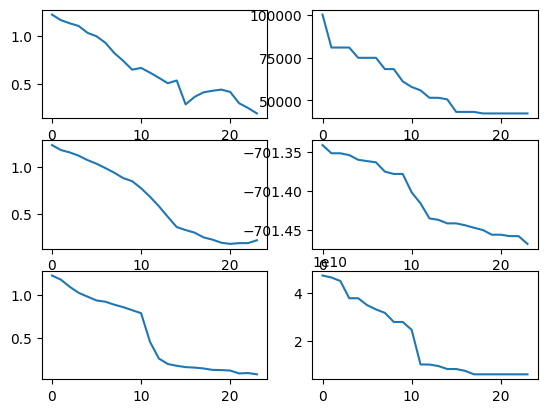

In [ ]:
amtea.run(eval_budget=2000, lp=10, tgap=10, k=3, up=10, delete_after_run=False)